In [20]:
import pandas as pd
%matplotlib inline
data = pd.read_csv("fireincidents.csv")
data.head()

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",1.0,2016-04-21T05:01:04,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,2,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",1.0,2018-03-13T08:34:43,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,3,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",0.0,2018-03-13T11:54:23,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,4,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0.0,2017-05-31T08:39:47,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,5,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1.0,2018-03-09T10:26:42,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607


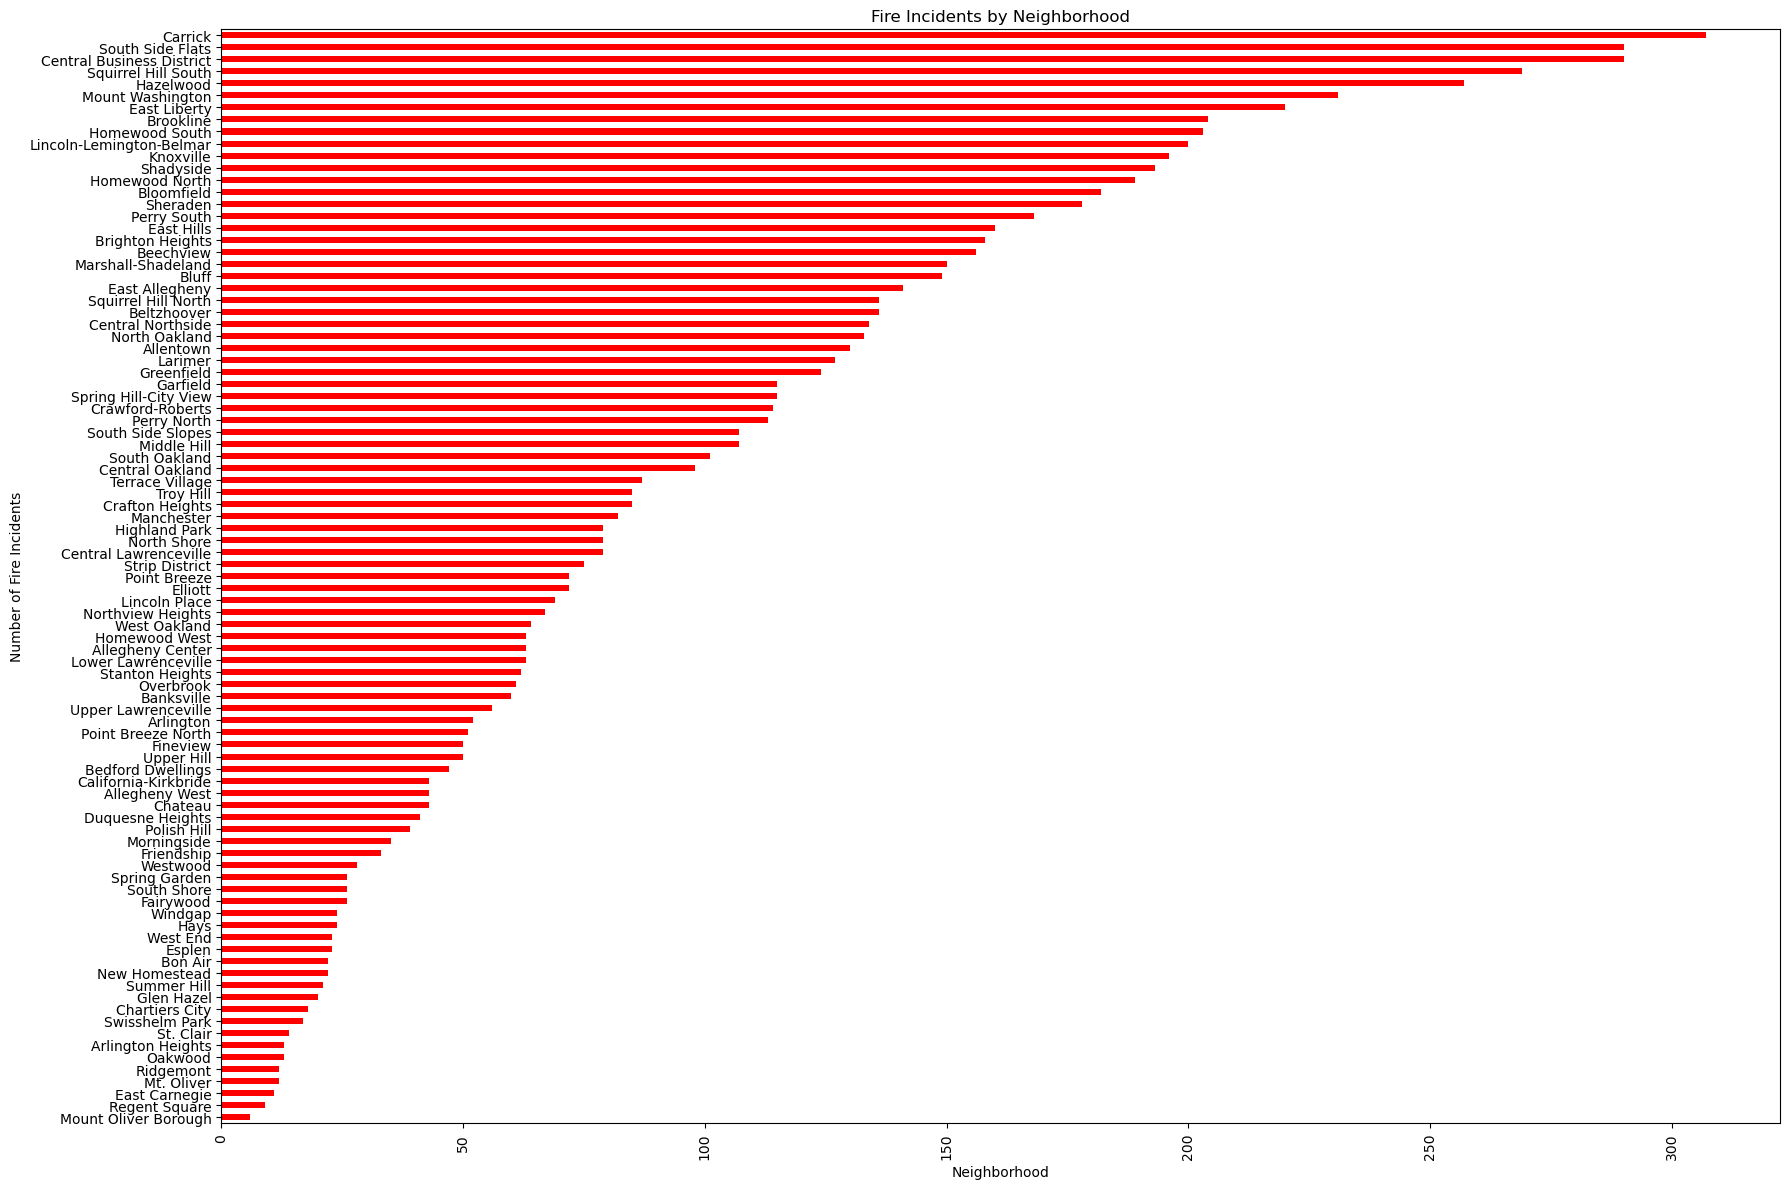

In [22]:
import matplotlib.pyplot as plt
count = data['neighborhood'].value_counts()
count_sorted = count.sort_values(ascending=True)
plt.figure(figsize=(18, 12))
count_sorted.plot(kind='barh', color='red')
plt.title('Fire Incidents by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Fire Incidents')
plt.xticks(rotation=90)  
plt.tight_layout() 
plt.show()

This shows all the neighborhoods in Pittsburgh from the largest amount of fire incidents to the smallest amount of fire incidents.

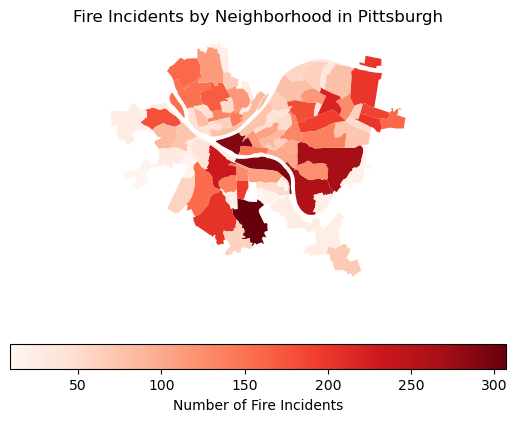

In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt
neighborhoods = gpd.read_file("Neighborhoods_.shp")
weights = count.reset_index()
weights.columns = ['Neighborhood', 'fire_incidents']
map_data = neighborhoods.merge(weights, how='left', left_on='hood', right_on='Neighborhood')
map_data.plot(column='fire_incidents', cmap='Reds', legend=True,
legend_kwds={'label': "Number of Fire Incidents",'orientation': "horizontal"})
plt.title("Fire Incidents by Neighborhood in Pittsburgh")
plt.axis('off')
plt.show()

**Conclusion:**
This dataset shows that Mount Oliver Borough is the best neighborhood to live in due to the low amount of fire incidents. Fire incidents usually occur due to human error and because Mount Oliver Borough has the least amount of fire incidents, we can conclude the neighborhood is full of responsible and intelligent people.